### Importing Relevant Things 

### Loading the modified dataset

In [127]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import chi2, mutual_info_classif, f_regression, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2, mutual_info_classif, f_regression, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
df = pd.read_csv('/Users/haochenyang/Desktop/EECS545/Project/data_merged.csv')
list(df.columns)

# Two of the columns containing almost constant values are eliminated because owing to their constant values, 
# they will not affect the output at all. 
#del df['popularity_ar']
#del df['popularity_yr']

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'key_0',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'genre_0',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'genre_6',
 'genre_7',
 'genre_8',
 'genre_9',
 'Minor',
 'Major']

In [128]:
df.head()
print(df['duration_ms'][0:10])

0    218293.0
1    215613.0
2    166875.0
3    222369.0
4    214408.0
5    416132.0
6    292800.0
7    204800.0
8    170463.0
9    165132.0
Name: duration_ms, dtype: float64


### Linear Regression

In [129]:
# Define the feature dataset
X = df[df.columns.difference(['popularity'])]

# Define the value we want to predict
y = df['popularity']

In [130]:
# Splitting data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Initial Run

In [131]:
# Train linear regressor
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict on train data
y_pred_training = lin_reg.predict(X_train)

# Print r_2 scores and RMSE for training set
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train, y_pred_training))
print(y_train[0:20])
print(y_pred_training[0:20])
print('Root mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train, y_pred_training)))

For Train Data
Coefficient of determination: 0.62373
38480    61.0
32973     0.0
3757     38.0
8815     42.0
40266    51.0
20370    69.0
29910    55.0
21436    51.0
5173     16.0
38370    63.0
39882    55.0
8742     48.0
7420     24.0
34114    34.0
22097    49.0
36329    34.0
17928    40.0
15711    45.0
32691     0.0
4892     15.0
Name: popularity, dtype: float64
[59.72740239 27.58620661 37.82509466 42.527359   58.37319639 57.13196595
 58.83574437 61.29196152 23.11695946 56.11879984 59.17792927 41.28749244
 20.42369457 32.24526172 60.17450071 30.2287131  45.20932972 50.76823472
 27.79266755 23.94854596]
Root mean squared error: 9.49829


/var/folders/xp/mx63m_l53gs9yshjz95jy1pm0000gn/T/ipykernel_54281/596196604.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_train[0:20])


In [132]:
# Predict on test data
y_pred = lin_reg.predict(X_test)
print(y_pred[:20])
print(y_test)
# Print r_2 scores and RMSE for test set
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test, y_pred))


print(y_test[0:20])
print(y_pred[0:20])
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

[37.01089432 25.85024058 45.59349367 28.48152599 60.95189207 60.90855249
 33.70743183 25.36302974 35.1931865  45.59462097 56.98669395 37.67552589
 39.81012843 34.856689   39.42737282 57.69537237 30.63406735 50.45107876
 25.30605647 60.3892384 ]
216      46.0
4199     32.0
16922    37.0
33257    33.0
20845    78.0
         ... 
10274    52.0
29577    51.0
27168    20.0
40424    50.0
26833    34.0
Name: popularity, Length: 12167, dtype: float64
For Test Data
Coefficient of determination: 0.63049
216      46.0
4199     32.0
16922    37.0
33257    33.0
20845    78.0
23297    69.0
26151    25.0
5881     26.0
26281    37.0
17239    41.0
38033    57.0
1457     47.0
1282     42.0
25533    30.0
3519     34.0
36947    52.0
35579     0.0
12630    41.0
4943     32.0
28507    67.0
Name: popularity, dtype: float64
[37.01089432 25.85024058 45.59349367 28.48152599 60.95189207 60.90855249
 33.70743183 25.36302974 35.1931865  45.59462097 56.98669395 37.67552589
 39.81012843 34.856689   39.42737282 57.69

/var/folders/xp/mx63m_l53gs9yshjz95jy1pm0000gn/T/ipykernel_54281/2333627209.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[0:20])


#### Feature Selection
Now, we perform feature selection using the SelectKBest class in sklearn. First, we plot a graph of the co-efficient of determination vs. number of features and see how many features out of 34 we require to retain for sufficient accuracy. 

In [134]:
r_2scores = []
rmse = []
for i in range(1,35):
    EX = SelectKBest(f_regression, k =i).fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(EX, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r_2scores.append(r2_score(y_test, y_pred))

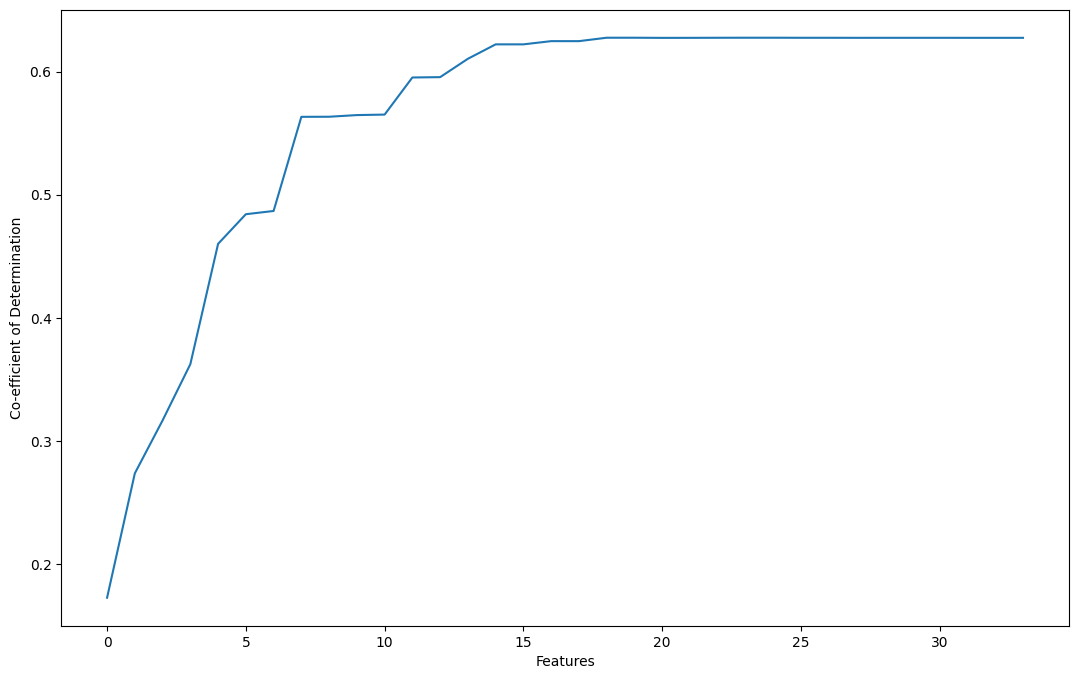

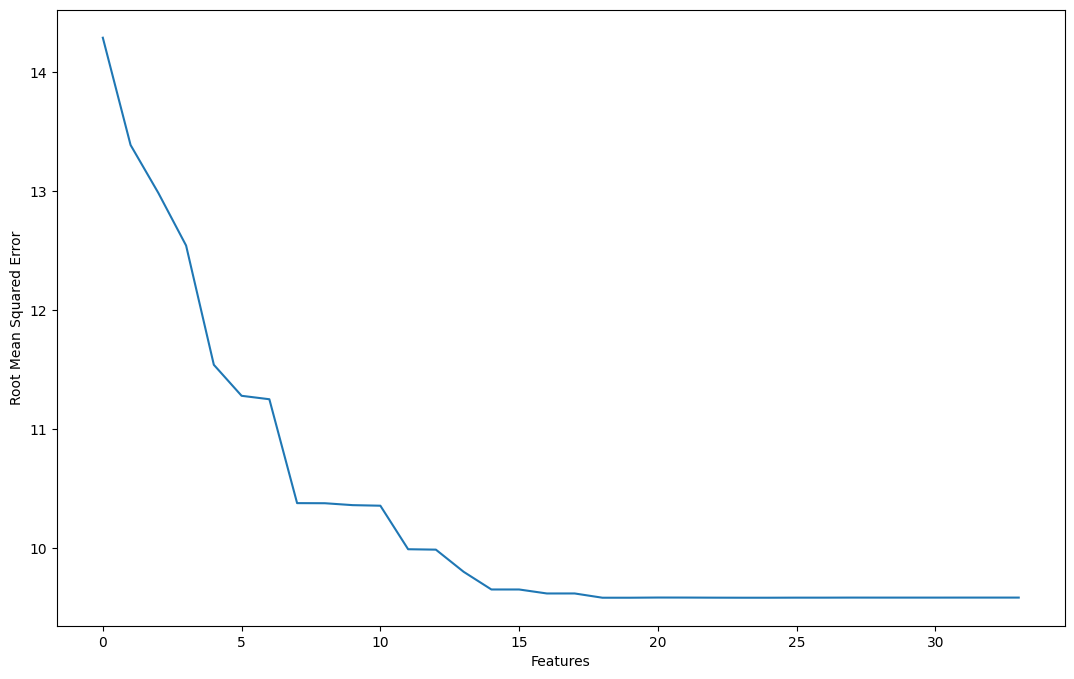

In [135]:
plt.figure(figsize = (13,8))
plt.plot(r_2scores)
plt.xlabel("Features")
plt.ylabel("Co-efficient of Determination")
plt.savefig('r2_score.png', pad_inches=0)
plt.show()

plt.figure(figsize = (13,8))
plt.plot(rmse)
plt.xlabel("Features")
plt.ylabel("Root Mean Squared Error")
plt.savefig('rmse.png', pad_inches=0)
plt.show()

#### Final Run

We see a clear jump in accuracy for the first few features after which the $r_2$ scores plateau. We pick $k = 23$ to be a fair number of features for linear regression after which the gain in accuracy is not worth the computing cost.

In [145]:
X_final = SelectKBest(f_regression, k =23).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train linear regressor
lin_reg = LinearRegression().fit(X_train, y_train)0

# Predict on train data
y_pred_training = lin_reg.predict(X_train)

# Print r_2 scores and RMSE for training set
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train, y_pred_training))
print('Root mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train, y_pred_training)))

For Train Data
Coefficient of determination: 0.62538
Root mean squared error: 9.48916


In [137]:
# Predicting on test data
y_pred = lin_reg.predict(X_test)

# Print r_2 scores and RMSE for test set
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test, y_pred))
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

For Test Data
Coefficient of determination: 0.62746
Root Mean squared error: 9.58725


### Polynomial Regression

In [147]:
# Specify the degree of polynomial features

poly = PolynomialFeatures(degree=3) # Degree 3 needs more RAM to run than is available. 
X_poly = poly.fit_transform(X_final)

# Split dataset in to train and test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.2, random_state = 42)

# Train polynomial regressor
poly_reg = LinearRegression().fit(X_train1, y_train1)

# Predict for train set
y_pred_train = poly_reg.predict(X_train1)
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train1, y_pred_train))
print('Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train1, y_pred_train)))

# Predict for test data
y_pred1 = poly_reg.predict(X_test1)
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test1, y_pred1))
print('Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test1, y_pred1)))

For Train Data
Coefficient of determination: 0.61046
Mean squared error: 9.67633
For Test Data
Coefficient of determination: 0.51086
Mean squared error: 10.98551


The improvement here is of $~0.1\ \%$ compared to linear regression with no polynomial features. 

###  Logistic Regression

In [139]:
# Changing our output from a continuous value to two labels: 1 if the song is popular, 0 if the song isn't.
# The threshold is selected using data from billboard chart data. 
# y_log = pd.cut(x=df["popularity"], bins=[-1,42,100], labels=[0,1]) ## Threshold can be either 50 or 26 (mean)

# Manually varying k again leads to plateau in accuracy scores after around k=27.
X_log = SelectKBest(f_classif, k=27).fit_transform(X, y)

In [140]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_log, y, test_size=0.2, random_state=42)
log_clf = LogisticRegression(random_state=42).fit(X_train2, y_train2)

from joblib import dump
dump(log_clf, "mlspotify_LogR")

y_pred2 = log_clf.predict(X_test2)

print('\033[1mClassification Report')
print('\033[0m')
print(classification_report(y_test2, y_pred2))

print('\033[1mConfusion Matrix')
print('\033[0m')
print(confusion_matrix(y_test2, y_pred2))

Classification Report

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       119
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00        10
         9.0       0.00      0.00      0.00         9
        10.0       0.00      0.00      0.00        16
        11.0       0.00      0.00      0.00        18
        12.0       0.00      0.00      0.00        27
        13.0       0.00      0.00      0.00        29
        14.0       0.00      0.00      0.00        38
        15.0       0.00      0.00      0.00        37
        16.0       0.00      0.00      0.00        39
    

/Users/haochenyang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haochenyang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haochenyang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pre

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = log_clf.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test2, lr_probs)
lr_auc

ValueError: multi_class must be in ('ovo', 'ovr')

In [142]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test2, lr_probs)
np.save("fpr_LR", fpr)
np.save("tpr_LR", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

ValueError: multiclass format is not supported

SVM: f1=0.743 auc=0.844
0.24687917319862973


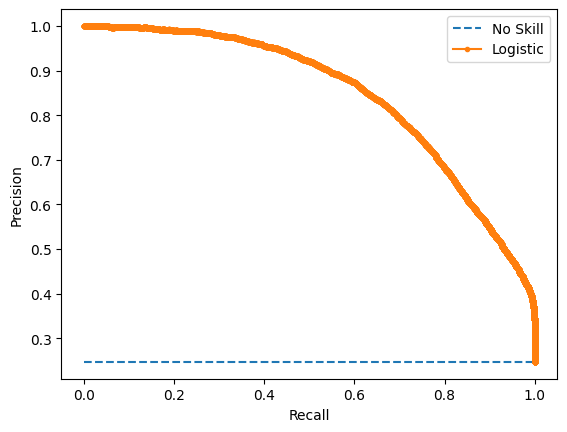

In [39]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test2, lr_probs)
np.save("lrp_LR", lr_precision)
np.save("lrr_LR", lr_recall)
lr_f1, lr_auc = f1_score(y_test2, y_pred2), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test2[y_test2==1]) / len(y_test2)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()